Image dimensions: 4333 x 3250


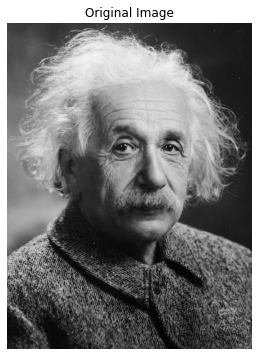

In [1]:
#1

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
ImJPG = cv2.imread('C:/Users/Harshith/Downloads/laproject/einstein.jpg')

# Convert to RGB (OpenCV loads images in BGR format)
ImJPG = cv2.cvtColor(ImJPG, cv2.COLOR_BGR2RGB)

# Get dimensions
m, n, _ = ImJPG.shape

# Display image dimensions
print(f"Image dimensions: {m} x {n}")

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(ImJPG)
plt.axis('off')
plt.title('Original Image')
plt.show()


In [3]:
#2

# Generate noise matrix with the same dimensions as ImJPG
noise = 50 * (np.random.rand(m, n, 3) - 0.5)

# Add noise to each channel of the image
ImJPG_Noisy = np.double(ImJPG) + noise

In [4]:
#4

Kernel_Average1 = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]]) / 5
Kernel_Average2 = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]]) / 9


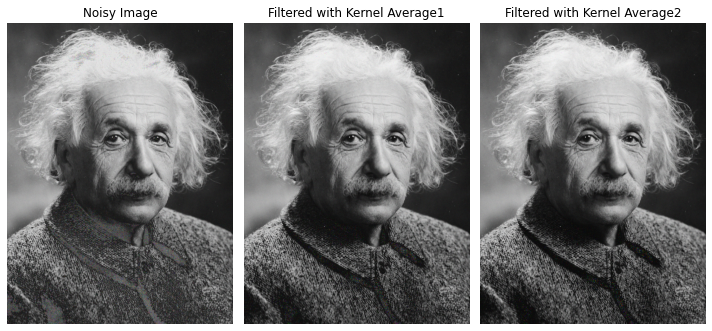

In [6]:
#5

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Initialize arrays to store filtered results
ImJPG_Average1 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)
ImJPG_Average2 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

# Apply the convolution filter to each channel separately
for channel in range(3):
    ImJPG_Average1[:, :, channel] = convolve2d(ImJPG_Noisy[:, :, channel], Kernel_Average1, mode='same', boundary='symm')
    ImJPG_Average2[:, :, channel] = convolve2d(ImJPG_Noisy[:, :, channel], Kernel_Average2, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Average1 = np.uint8(ImJPG_Average1)
ImJPG_Average2 = np.uint8(ImJPG_Average2)

# Display the resulting images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.uint8(ImJPG_Noisy))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Average1)
plt.title('Filtered with Kernel Average1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Average2)
plt.title('Filtered with Kernel Average2')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
#6

# Define the Gaussian blur kernel matrix
Kernel_Gauss = np.array([[0, 1, 0],
                         [1, 4, 1],
                         [0, 1, 0]]) / 8

print("Kernel Gauss:")
print(Kernel_Gauss)

Kernel Gauss:
[[0.    0.125 0.   ]
 [0.125 0.5   0.125]
 [0.    0.125 0.   ]]


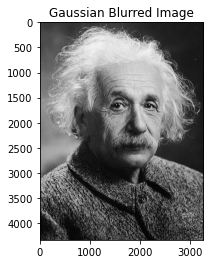

In [10]:
#7

# Initialize arrays to store filtered results
ImJPG_Gauss = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

#Apply the convolution filter to each channel separately
for channel in range(3):
    ImJPG_Gauss[:, :, channel] = convolve2d(ImJPG_Noisy[:, :, channel], Kernel_Gauss, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Gauss = np.uint8(np.clip(ImJPG_Gauss, 0, 255))

# Display the resulting image
plt.figure()
plt.imshow(ImJPG_Gauss)
plt.title('Gaussian Blurred Image')
plt.show()

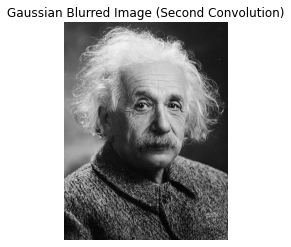

In [11]:
#8

# Perform Gaussian blur convolution on ImJPG_Gauss
ImJPG_Gauss2 = np.zeros_like(ImJPG_Gauss, dtype=np.float64)

for channel in range(3):
    ImJPG_Gauss2[:, :, channel] = convolve2d(ImJPG_Gauss[:, :, channel], Kernel_Gauss, mode='same', boundary='symm')

ImJPG_Gauss2 = np.uint8(np.clip(ImJPG_Gauss2, 0, 255))

# Display the resulting image
plt.figure()
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blurred Image (Second Convolution)')
plt.axis('off')
plt.show()


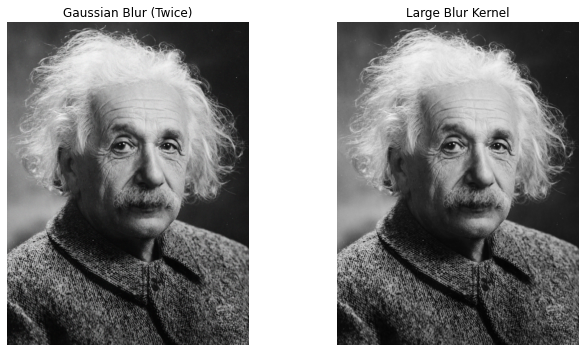

In [12]:
#9

# Define the larger blur kernel (Kernel Large)
Kernel_Large = np.array([[0, 1, 2, 1, 0],
                         [1, 4, 8, 4, 1],
                         [2, 8, 16, 8, 2],
                         [1, 4, 8, 4, 1],
                         [0, 1, 2, 1, 0]]) / 80

# Apply the larger blur kernel to the image
ImJPG_Large = np.zeros_like(ImJPG, dtype=np.float64)
for channel in range(3):
    ImJPG_Large[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Large, mode='same', boundary='symm')

ImJPG_Large = np.uint8(np.clip(ImJPG_Large, 0, 255))

# Display the resulting images
plt.figure(figsize=(10, 5))

# Display Gaussian blurred image (second convolution)
plt.subplot(1, 2, 1)
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blur (Twice)')
plt.axis('off')

# Display larger blur image
plt.subplot(1, 2, 2)
plt.imshow(ImJPG_Large)
plt.title('Large Blur Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
#10

# Define the sharpening kernels
Kernel_Sharp1 = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

Kernel_Sharp2 = np.array([[-1, -1, -1],
                          [-1, 9, -1],
                          [-1, -1, -1]])

# Display the kernels (optional)
print("Kernel Sharp1:\n", Kernel_Sharp1)
print("\nKernel Sharp2:\n", Kernel_Sharp2)

Kernel Sharp1:
 [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

Kernel Sharp2:
 [[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


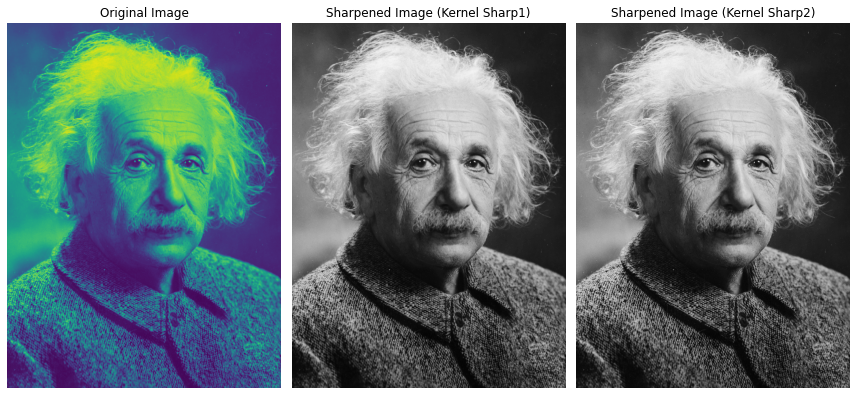

In [28]:
#11

# Check the dimensions of ImJPG
if ImJPG.ndim == 3:
    # Convert RGB to grayscale if necessary
    ImJPG = np.mean(ImJPG, axis=2).astype(np.uint8)

# Define the sharpening kernels
Kernel_Sharp1 = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

Kernel_Sharp2 = np.array([[-1, -1, -1],
                          [-1, 9, -1],
                          [-1, -1, -1]])

# Apply convolution with Kernel_Sharp1
ImJPG_Sharp1 = convolve2d(ImJPG, Kernel_Sharp1, mode='same', boundary='symm')

# Apply convolution with Kernel_Sharp2
ImJPG_Sharp2 = convolve2d(ImJPG, Kernel_Sharp2, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Sharp1 = np.clip(ImJPG_Sharp1, 0, 255).astype(np.uint8)
ImJPG_Sharp2 = np.clip(ImJPG_Sharp2, 0, 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(ImJPG)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sharp1, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sharp2, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp2)')
plt.axis('off')

plt.tight_layout()
plt.show()

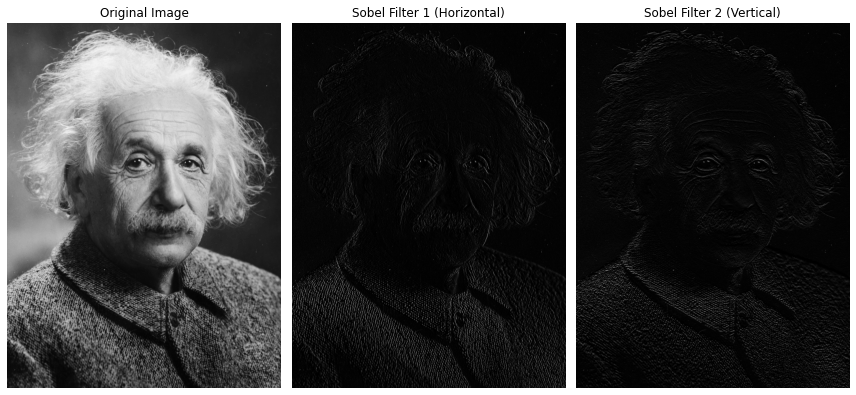

In [23]:
#12,13

# Check the dimensions of ImJPG
if ImJPG.ndim == 3:
    # Convert RGB to grayscale if necessary
    ImJPG = np.mean(ImJPG, axis=2).astype(np.uint8)

# Define Sobel kernels
Kernel_Sobel1 = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

Kernel_Sobel2 = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

# Perform convolution with Sobel kernels
ImJPG_Sobel1 = convolve2d(ImJPG, Kernel_Sobel1, mode='same', boundary='symm')
ImJPG_Sobel2 = convolve2d(ImJPG, Kernel_Sobel2, mode='same', boundary='symm')

# Clip and convert the results back to uint8 for display
ImJPG_Sobel1 = np.uint8(np.clip(ImJPG_Sobel1, 0, 255))
ImJPG_Sobel2 = np.uint8(np.clip(ImJPG_Sobel2, 0, 255))

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sobel1, cmap='gray')
plt.title('Sobel Filter 1 (Horizontal)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sobel2, cmap='gray')
plt.title('Sobel Filter 2 (Vertical)')
plt.axis('off')

plt.tight_layout()
plt.show()

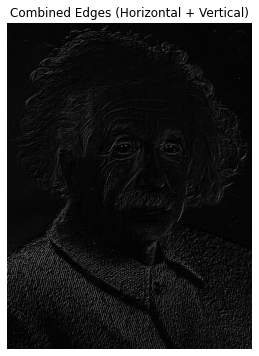

In [27]:
#14

# Check if the image is RGB and convert to grayscale if necessary
if ImJPG.ndim == 3:
    ImJPG = np.mean(ImJPG, axis=2).astype(np.uint8)

# Define Sobel kernels
Kernel_Sobel1 = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

Kernel_Sobel2 = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

# Perform convolution with Sobel kernels
ImJPG_Sobel1 = convolve2d(ImJPG, Kernel_Sobel1, mode='same', boundary='symm')
ImJPG_Sobel2 = convolve2d(ImJPG, Kernel_Sobel2, mode='same', boundary='symm')

# Combine horizontal and vertical edge images
ImJPG_SobelCombined = ImJPG_Sobel1 + ImJPG_Sobel2

# Clip and convert the combined result back to uint8 for display
ImJPG_SobelCombined = np.uint8(np.clip(ImJPG_SobelCombined, 0, 255))

# Display the combined edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_SobelCombined, cmap='gray')
plt.title('Combined Edges (Horizontal + Vertical)')
plt.axis('off')
plt.show()

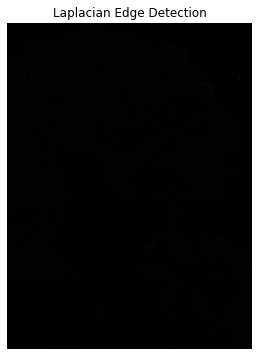

In [32]:
# Ensure the image is RGB (3 channels)
if ImJPG.ndim == 2:
    ImJPG = np.stack([ImJPG] * 3, axis=-1)  # Convert grayscale to RGB

# Define Laplace kernel
Kernel_Laplace = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])

# Apply convolution with Laplace kernel to each channel separately
ImJPG_Laplace = np.zeros_like(ImJPG, dtype=np.float64)
for channel in range(3):
    ImJPG_Laplace[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Laplace, mode='same', boundary='symm')

# Clip and convert the result back to uint8 for display
ImJPG_Laplace = np.uint8(np.clip(ImJPG_Laplace, 0, 255))

# Display the Laplacian edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_Laplace)
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()